### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_movie_title(id):
    row = movies.loc[movies['movieId'] == id]
    return row['title']

In [3]:
data_path = '../raw_data/ml-25m/'
movies = pd.read_csv(data_path + 'movies.csv')
ratings = pd.read_csv(data_path + 'ratings.csv')

In [4]:
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId')

In [5]:
ratings

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004)
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995)
25000093,162386,200726,4.0,1554651417,The Graduates (1995)


In [6]:
ratings.userId.nunique()

162541

In [7]:
ratings.movieId.nunique()

59047

In [8]:
possible_rates = ratings.rating.unique()
np.sort(possible_rates, axis=0)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [9]:
ratings.movieId.value_counts().head(10)

356     81491
318     81482
296     79672
593     74127
2571    72674
260     68717
480     64144
527     60411
110     59184
2959    58773
Name: movieId, dtype: int64

In [10]:
def get_most_rated_movies_df(ratings_df, top_number):
    most_rated_movies = ratings_df.movieId.value_counts().head(top_number).index
    return ratings_df[ratings_df.movieId.isin(most_rated_movies)].copy()

In [11]:
ratings_top = get_most_rated_movies_df(ratings, 50)
ratings_top

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
12008057,162533,1721,2.5,1281406171,Titanic (1997)
12008058,162534,1721,3.5,1526713829,Titanic (1997)
12008059,162538,1721,4.0,1438781404,Titanic (1997)
12008060,162539,1721,5.0,995149720,Titanic (1997)


In [12]:
rates_per_user = ratings_top.userId.value_counts()
rates_per_user

58402     50
22386     50
10361     50
112101    50
30112     50
          ..
84339      1
106770     1
122676     1
80340      1
88727      1
Name: userId, Length: 157481, dtype: int64

In [13]:
cumulative_rates_per_user = rates_per_user.cumsum()
cumulative_rates_per_user

58402          50
22386         100
10361         150
112101        200
30112         250
           ...   
84339     2544545
106770    2544546
122676    2544547
80340     2544548
88727     2544549
Name: userId, Length: 157481, dtype: int64

<AxesSubplot:ylabel='userId'>

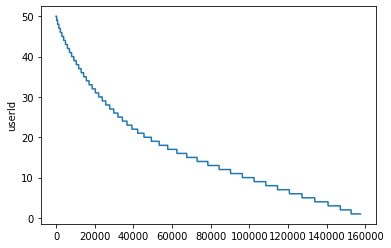

In [14]:
x_axis = list(range(1,len(rates_per_user)+1))
sns.lineplot(x=x_axis, y=rates_per_user)

<AxesSubplot:ylabel='userId'>

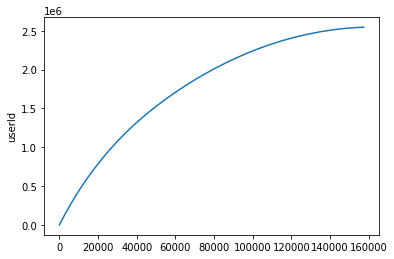

In [15]:
sns.lineplot(x=x_axis, y=cumulative_rates_per_user)

In [35]:
def get_users_with_min_max_num_of_ratings_df(ratings_df, min_num_of_ratings, max_num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_min_num_of_ratings = ratings_df.userId.value_counts() >= min_num_of_ratings
    bolean_users_with_max_num_of_ratings = ratings_df.userId.value_counts() <= max_num_of_ratings
    users_with_min_max_num_of_ratings = rates_per_user[ 
        bolean_users_with_min_num_of_ratings &
        bolean_users_with_max_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_min_max_num_of_ratings)].copy()

In [16]:
def get_users_with_min_num_of_ratings_df(ratings_df, min_num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_min_num_of_ratings = ratings_df.userId.value_counts() >= min_num_of_ratings
    users_with_min_num_of_ratings = rates_per_user[bolean_users_with_min_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_min_num_of_ratings)].copy()

In [17]:
def get_users_with_num_of_ratings_df(ratings_df, num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_num_of_ratings = ratings_df.userId.value_counts() == num_of_ratings
    users_with_num_of_ratings = rates_per_user[bolean_users_with_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_num_of_ratings)].copy()

In [18]:
ratings_top_users_top = get_users_with_num_of_ratings_df(ratings_top, 20)
ratings_top_users_top

,userId,movieId,rating,timestamp,title
6,10,296,4.5,1227571308,Pulp Fiction (1994)
30,62,296,4.5,1148504842,Pulp Fiction (1994)
40,82,296,2.5,1437237189,Pulp Fiction (1994)
47,101,296,3.5,1457357502,Pulp Fiction (1994)
76,158,296,5.0,835484979,Pulp Fiction (1994)
...,...,...,...,...,...
12007931,162052,1721,4.0,1451167846,Titanic (1997)
12007944,162119,1721,4.0,997307617,Titanic (1997)
12007982,162269,1721,4.5,1105577406,Titanic (1997)
12008003,162347,1721,3.5,1237072843,Titanic (1997)


In [19]:
df = ratings_top_users_top.pivot(index='userId', columns='title', values='rating')
df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,3.0,NaN,4.0,NaN,3.0,4.0,NaN,NaN,3.5,...,5.0,5.0,5.0,4.0,NaN,NaN,3.5,3.5,4.0,5.0
62,NaN,NaN,5.0,NaN,NaN,NaN,4.5,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
64,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,...,5.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
82,NaN,NaN,3.5,NaN,NaN,NaN,3.5,NaN,NaN,3.5,...,NaN,NaN,NaN,1.5,NaN,NaN,4.0,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,...,5.0,5.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,3.5,NaN,3.5,4.0,4.0,3.5,NaN,NaN,NaN,...,NaN,NaN,4.0,4.5,NaN,NaN,3.5,3.0,NaN,NaN
162347,4.0,3.5,NaN,NaN,NaN,NaN,5.0,NaN,4.5,NaN,...,4.5,4.5,NaN,NaN,4.5,3.5,NaN,NaN,5.0,NaN
162418,4.0,4.0,NaN,2.0,NaN,3.0,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,4.0,4.0,NaN,4.0


In [20]:
df.to_csv('../raw_data/streamlit-data/ratings_top_users_top.csv', columns=df.columns, index=True)

### Lite base 

In [21]:
data_lite = pd.read_csv('../raw_data/treated-db/data.csv')
data_lite = data_lite[data_lite['vote_count']>=100].reset_index(drop=True)
data_lite

,movieId,tmdbId,title,genres,actors,director,overview,keywords,language,popularity,poster_path,release,runtime,vote_average,vote_count
0,1,862.0,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...","['Tom Hanks', 'Tim Allen', 'Don Rickles']",['John Lasseter'],"Led by Woody, Andy's toys live happily in his ...","['martial arts', 'jealousy', 'toy', 'friendshi...",en,58.282,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,1995-10-30,81.0,7.9,13191
1,2,8844.0,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],When siblings Judy and Peter discover an encha...,"['giant insect', 'board game', 'jungle', 'disa...",en,11.157,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,1995-12-15,104.0,7.2,7722
2,3,15602.0,Grumpier Old Men (1995),"['Comedy', 'Romance']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",['Howard Deutch'],A family wedding reignites the ancient feud be...,"['fishing', 'old man', 'best friend', 'duringc...",en,11.458,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,1995-12-22,101.0,6.6,219
3,5,11862.0,Father of the Bride Part II (1995),['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short']",['Charles Shyer'],Just when George Banks has recovered from his ...,"['parent child relationship', 'baby', 'midlife...",en,11.431,/lf9RTErt8BSLQy98aSFblElvsCQ.jpg,1995-12-08,106.0,6.2,446
4,6,949.0,Heat (1995),"['Action', 'Crime', 'Thriller']","['Al Pacino', 'Robert De Niro', 'Val Kilmer']",['Michael Mann'],"Obsessive master thief, Neil McCauley leads a ...","['robbery', 'detective', 'obsession', 'chase',...",en,20.386,/rrBuGu0Pjq7Y2BWSI6teGfZzviY.jpg,1995-12-15,170.0,7.9,4374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,208773,586940.0,I Lost My Body (2019),"['Animation', 'Drama']","['Hakim Faris', 'Victoire Du Bois', ""Patrick d...",['Jérémy Clapin'],"A story of Naoufel, a young man who is in love...","['based on novel or book', 'cartoon', 'flashba...",fr,8.869,/z5dXCywyo8zEPNDkeQY7nbvkrz8.jpg,2019-11-06,81.0,7.6,763
9561,208800,512895.0,Lady and the Tramp (2019),"['Comedy', 'Romance']","['Tessa Thompson', 'Justin Theroux', 'Kiersey ...",['Charlie Bean'],The love story between a pampered Cocker Spani...,"['freedom', 'family', 'streetwise', 'lady and ...",en,225.738,/8wBEye516IKul9sW7JKGcFXVGfV.jpg,2019-11-12,104.0,7.3,916
9562,208813,454467.0,Noelle (2019),['Children'],"['Anna Kendrick', 'Bill Hader', 'Shirley MacLa...",['Marc Lawrence'],"Kris Kringle's daughter, Noelle, sets off on a...","['holiday', 'santa claus', 'family relationshi...",en,75.333,/ljxeeVQJra8O4slFsmmnf5NgFx4.jpg,2019-11-12,100.0,6.8,221
9563,208907,228177.0,Till Luck Do Us Part 2 (2013),['Comedy'],"['Leandro Hassum', 'Camila Morgado', 'Kiko Mas...",['Roberto Santucci'],"After all the trouble in the first film, Tino ...",['brazilian'],pt,4.977,/DOmK1UXPulQWLj3xdArcHKGQ9C.jpg,2013-12-27,102.0,5.7,192


In [22]:
ratings_lite = ratings[['userId','movieId','rating']].merge(data_lite[['movieId', 'title']], on='movieId', how='inner')
ratings_lite

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,3,296,5.0,Pulp Fiction (1994)
2,4,296,4.0,Pulp Fiction (1994)
3,5,296,4.0,Pulp Fiction (1994)
4,7,296,4.0,Pulp Fiction (1994)
...,...,...,...,...
22890801,146726,152862,3.0,L'abbiamo fatta grossa (2016)
22890802,148457,70920,3.5,Questo piccolo grande amore (2009)
22890803,155163,181299,3.0,Jacquou the Rebel (2007)
22890804,160007,204214,4.5,Burn Out (2017)


In [31]:
ratings_lite_top = get_most_rated_movies_df(ratings_lite, 1000)
ratings_lite_top

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,3,296,5.0,Pulp Fiction (1994)
2,4,296,4.0,Pulp Fiction (1994)
3,5,296,4.0,Pulp Fiction (1994)
4,7,296,4.0,Pulp Fiction (1994)
...,...,...,...,...
20957020,162394,128360,4.0,The Hateful Eight (2015)
20957021,162424,128360,5.0,The Hateful Eight (2015)
20957022,162501,128360,4.5,The Hateful Eight (2015)
20957023,162516,128360,4.5,The Hateful Eight (2015)


In [40]:
ratings_lite_top_2 = get_users_with_min_max_num_of_ratings_df(ratings_lite_top, 300, 1000)
ratings_lite_top_2

,userId,movieId,rating,title
1,3,296,5.0,Pulp Fiction (1994)
7,12,296,5.0,Pulp Fiction (1994)
24,43,296,5.0,Pulp Fiction (1994)
34,72,296,5.0,Pulp Fiction (1994)
36,75,296,3.0,Pulp Fiction (1994)
...,...,...,...,...
20957018,162349,128360,5.0,The Hateful Eight (2015)
20957019,162386,128360,4.5,The Hateful Eight (2015)
20957020,162394,128360,4.0,The Hateful Eight (2015)
20957021,162424,128360,5.0,The Hateful Eight (2015)


In [41]:
%%time
ratings_lite_top_2.to_csv('../raw_data/streamlit-data/ratings_lite.csv', index=True)

CPU times: user 14 s, sys: 344 ms, total: 14.4 s
Wall time: 15.4 s


In [42]:
%%time
df_lite = ratings_lite_top_2.pivot(index='userId', columns='title', values='rating')
df_lite

CPU times: user 2.19 s, sys: 393 ms, total: 2.58 s
Wall time: 2.72 s


title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN
12,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,3.5
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,5.0,NaN,3.0,5.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0
75,3.5,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162508,2.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN
162512,NaN,5.0,NaN,3.0,NaN,NaN,2.5,4.0,NaN,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN
162516,4.0,3.5,3.5,4.0,4.5,4.0,1.5,4.5,4.0,3.5,...,4.0,4.5,2.5,4.0,2.5,4.0,3.0,3.0,4.0,2.0


In [ ]:
# df_lite.to_csv('../raw_data/streamlit-data/ratings_lite.csv', index=True)

### Item Based colaborative filter

In [ ]:
def standardize(series):
    new_series = (series - series.mean(skipna=True))
    return new_series

In [ ]:
ratings_std_by_column = df.apply(standardize, axis=0)
ratings_std_by_column

In [ ]:
ratings_std_by_col_fill = ratings_std_by_column.fillna(0)

#### Cossine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_similarity = cosine_similarity(ratings_std_by_col_fill.T)
item_similarity.shape

In [ ]:
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)
item_similarity_df

In [ ]:
def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    
    return similar_score

print(get_similar_movies("Seven (a.k.a. Se7en) (1995)",5))

In [ ]:
movies_ratings = [("Ace Ventura: Pet Detective (1994)",5),("Gladiator (2000)",1),("Jurassic Park (1993)",1),("Lord of the Rings: The Return of the King, The (2003)",5)]

similar_movies = pd.DataFrame()

for movie,rating in movies_ratings:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
    
similar_movies.head()
# similar_movies.sum().sort_values(ascending=False)


### User Based colaborative filter

In [ ]:
ratings_std_by_row = df.apply(standardize, axis=1)
ratings_std_by_row

In [ ]:
def make_user_ratings(movie_titles, ratings, df, zeros=True, std=True):
    number_of_movies = df.shape[1]
    if std:
        ratings_ = ratings - np.mean(ratings)
    else:
        ratings_ = ratings
    if zeros:
        new_user = pd.DataFrame([np.zeros(number_of_movies)], columns=df.columns)
    else:
        new_user = pd.DataFrame(np.nan, index=[0], columns=ratings_std_by_row_fill.columns)
    for movie_title, rating in zip(movie_titles, ratings_):
        new_user[movie_title] = rating
    return new_user

In [ ]:
user_rated_movies = [
        'Batman (1989)',
        'Memento (2000)',
        'Matrix, The (1999)',
        'Titanic (1997)',
        'Inception (2010)',
        'American Beauty (1999)',
        'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
        'Lord of the Rings: The Fellowship of the Ring, The (2001)',
        'Monty Python and the Holy Grail (1975)'
    ]

user_ratings = [1,4,3,1,4,1,1,5,1]

user_ratings_df = make_user_ratings(
    user_rated_movies,
    user_ratings,
    ratings_std_by_row_fill
)
user_ratings_df

#### Cossine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarities = cosine_similarity(ratings_std_by_row_fill, user_ratings_df)
user_similarities.shape

In [ ]:
user_similarities_df = pd.DataFrame(user_similarities, index = ratings_std_by_row_fill.index, columns=['similarity'])
user_similarities_df

In [ ]:
def get_similar_users(user_similarities_df, number_of_similar_users):
    return user_similarities_df.sort_values(by='similarity', ascending=False).head(number_of_similar_users).index
    
similar_users = get_similar_users(user_similarities_df, 10)
similar_users

In [ ]:
def get_movies_not_seen(users_movies_ratings, similar_users, user_rated_movies):
#     return users_movies_ratings.loc[similar_users].drop(columns=user_rated_movies)
        return users_movies_ratings.loc[similar_users]

movies_not_seen = get_movies_not_seen(ratings_std_by_row, similar_users, user_rated_movies)
movies_not_seen

In [ ]:
def get_recommended_movies(movies_not_seen_df):
    return movies_not_seen_df.mean(axis=0, skipna=True).sort_values(ascending=False)

get_recommended_movies(movies_not_seen)

#### Person similarity

In [ ]:
pearson_user_ratings_df_std = make_user_ratings(
    user_rated_movies,
    user_ratings,
    ratings_std_by_row,
    zeros=False,
    std=True
)

pearson_user_ratings_df = make_user_ratings(
    user_rated_movies,
    user_ratings,
    ratings_std_by_row,
    zeros=False,
    std=False
)
pearson_user_ratings_df_std

In [ ]:
user_pearson_similarities_std = ratings_std_by_row.corrwith(pearson_user_ratings_df_std.iloc[0], axis=1, drop=False, method='pearson')
print(user_pearson_similarities_std)
user_pearson_similarities = df.corrwith(pearson_user_ratings_df.iloc[0], axis=1, drop=False, method='pearson')
print(user_pearson_similarities)

In [ ]:
user_pearson_similarities_df = pd.DataFrame(user_pearson_similarities, index = df.index, columns=['similarity'])
user_pearson_similarities_df

In [ ]:
pearson_similar_users = get_similar_users(user_pearson_similarities_df, 10)
pearson_similar_users

In [ ]:
pearson_movies_not_seen = get_movies_not_seen(df, pearson_similar_users, user_rated_movies)
pearson_movies_not_seen

In [ ]:
pd.DataFrame(get_recommended_movies(pearson_movies_not_seen), columns=['Rating'])

### Using Surprise

In [ ]:
from surprise import Dataset, Reader, KNNWithMeans, SVD

In [ ]:
user_rated_movies = [
        'Batman (1989)',
        'Memento (2000)',
        'Matrix, The (1999)',
        'Titanic (1997)',
        'Inception (2010)',
        'American Beauty (1999)',
        'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
        'Lord of the Rings: The Fellowship of the Ring, The (2001)',
        'Monty Python and the Holy Grail (1975)'
    ]

user_ratings = [1,4,3,1,4,1,1,5,1]
user_id = [0,0,0,0,0,0,0,0,0]
ratings_dict = {
    'title': user_rated_movies,
    'rating': user_ratings,
    'userId': user_id
}

user_surprise_ratings = pd.DataFrame(ratings_dict)
user_surprise_ratings

In [ ]:
ratings_surprise_df = pd.concat([ratings_top_users_top, user_surprise_ratings])
ratings_surprise_df

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_surprise_df[["userId", "title", "rating"]], reader)

In [ ]:
sim_options = {
    "name": "pearson",
    "user_based": False,
}
algo = KNNWithMeans(sim_options=sim_options)

In [ ]:
trainingSet = data.build_full_trainset()

algo.fit(trainingSet)

In [ ]:
def get_predicted_ratings_from_surprise(model, movies):
    return [(title, model.predict(0, title).est) for title in movies]

In [ ]:
def get_recommended_movies_surprise(movie_list):
    movie_list.sort(key=lambda e: -e[1])
    return movie_list

In [ ]:
prediction = get_predicted_ratings_from_surprise(algo, ratings_surprise_df.title.unique())
get_recommended_movies_surprise(prediction)[:15]

In [ ]:
svd = SVD()

In [ ]:
trainingSet_SVD = data.build_full_trainset()

svd.fit(trainingSet_SVD)

In [ ]:
prediction_SVD = get_predicted_ratings_from_surprise(svd,ratings_surprise_df.title.unique())
get_recommended_movies_surprise(prediction_SVD)[:15]

In [ ]:
user_that_want_recommendation = 101

In [ ]:
def get_similar_users(user_similarity_df, user_id, number_of_similar_users):
    return user_similarity_df[user_id].copy().sort_values(ascending=False).head(number_of_similar_users)

get_similar_users(user_similarity_df, user_that_want_recommendation, 10)

In [ ]:
def get_movies_to_predict_rate():
    pass

def get_movies_already_watched_by_user(users_movies_df, user_id):
    return users_movies_df.loc[user_id,:].dropna().copy()
    

get_movies_already_watched_by_user(df, user_that_want_recommendation)

### Using KMeans to search for similaries clusters

In [ ]:
average_score_per_user = np.sort(ratings_std_filled.mean(axis=1),axis=0)
x_axis = list(range(1,ratings_std_filled.shape[0]+1))
sns.lineplot(x=x_axis, y=average_score_per_user)

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans

mbkm = KMeans(n_clusters=10)
mbkm.fit(ratings_std_filled)

In [ ]:
clusters = pd.Series(mbkm.labels_).value_counts()
clusters

In [ ]:
x_axis = list(range(1,len(clusters)+1))
sns.lineplot(x=x_axis, y=clusters)

In [ ]:
def make_user_ratings(movie_ids, ratings, df):
    number_of_movies = df.shape[1]
    new_user = pd.DataFrame([np.zeros(number_of_movies)], columns=df.columns).replace(0,3)
    for movie_id, rating in zip(movie_ids,ratings):
        new_user[movie_id] = rating
    new_user_std = new_user.apply(standardize, axis=1)
    return new_user_std

In [ ]:
import random

movie_names = list(df.columns)
new_user_ratings_2 = make_user_ratings(
    random.sample(movie_names, 20),
    [5 for i in range(20)],
    df
)

new_user_ratings_2

In [ ]:
mbkm.predict(new_user_ratings_2)